# Week 2 - Implementation of Shaffer et al

In [1]:
# This line tells matplotlib to include plots here
%matplotlib inline
import numpy as np # We'll need numpy later
from scipy.stats import kstest, ttest_ind, ks_2samp, zscore
import matplotlib.pyplot as plt # This lets us access the pyplot functions

## (1) Estimation of a sample mean from a normally distributed variable.

Let us assume that a true distribution of a process is described by the normal distribution with $\mu=5$ and $\sigma=1$. You have a measurement technique that allows you to sample n points from this distribution. In Python we can use a random number generator whose numbers will be chosen from the desired normal distribution by using the function `np.random.normal`. Sample from this normal distribution from n=1 to 50 (i.e. n=1:50). Create a plot for the standard deviation of the calculated mean from each n when you repeat the sampling 1000 times each. (i.e. You will repeat your n observations 1000 times and will calculate the sample mean for each of the 1000 trials).

In [2]:
meanArray = np.zeros((50, 1000)) #for storing 1000 mean values for 50 n values
stdArray = np.zeros(50) #for storing 50 std dev values for 50 n values

def sampleMeans():

    for i in range(50):
        for j in range(1000):
            array = np.random.normal(5,1,i+1) #sample from normal distribution 1 - 1000 times
            meanArray[i][j] = np.mean(array) #storing each calculated mean in an array
        stdArray[i] = np.std(meanArray[i,:], ddof = 1) #storing standard deviation of calculated mean

sampleMeans()

#### 1a. Plot the standard deviation of the sample mean versus n. Add a second line which is 1/sqrt(n). Describe what this tells you about the relationship between n and your power to estimate the underlying mean.

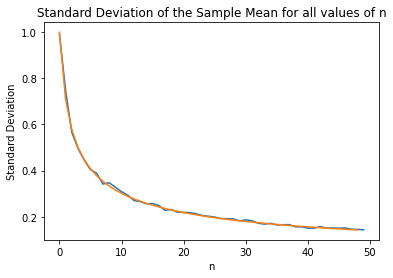

The relationship between n and the power to estimate the underlying mean tells us that we have a strong power to estimate the underlying mean. This is because both plots relatively follow the same trend to show that the standard deviation approaches 0.1.


In [3]:
def stdPlot():
    y = stdArray #std values
    
    oneOverSqrt = list(range(1,50))
    z = np.sqrt(oneOverSqrt)
    
    plt.plot(y) #standard deviation
    plt.plot(1/z) #1/sqrt(n)
    plt.xlabel('n')
    plt.ylabel('Standard Deviation')
    plt.title('Standard Deviation of the Sample Mean for all values of n')
    plt.show()
    
stdPlot()

print("The relationship between n and the power to estimate the underlying mean tells us that we have a strong power to estimate the underlying mean. This is because both plots relatively follow the same trend to show that the standard deviation approaches 0.1.")

#### 1b. Plot the boxplot for the sample means for all values n. Using words, interpret what the boxplot view of the 1000 trials for n=1 means and what the trends in the boxplot demonstrate compared to the plot in 1a. What information do you gain or lose in the two different plotting schemes?

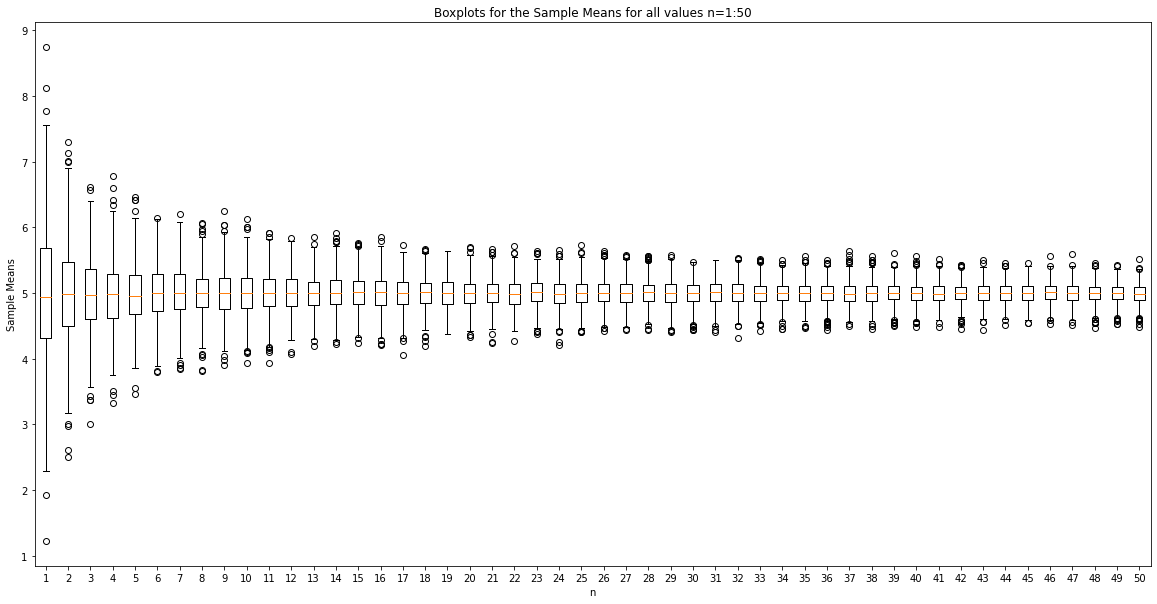

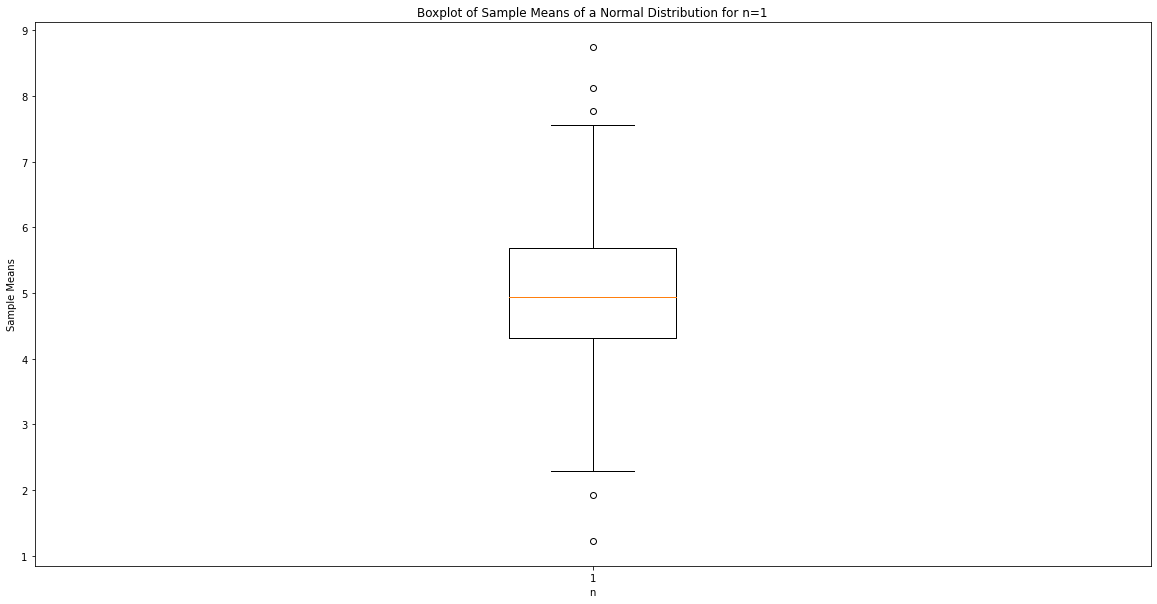

The boxplot view of the 1000 trials for n = 1 means that the median is very close to 5.0
There are outliers, and the interquartile ranges get smaller as n increases.
Trends in the boxplot demonstrate that the average mean values lies around 5.0 whereas the plot in 1a demonstrates that the standard deviation lies around 0.1. The information gained is the mean with the boxplot. The information lost with the plotting scheme in 1a is the mean.


In [4]:
#figure 1 for all values n
plt.figure(figsize=(20, 10))
plt.boxplot(meanArray.T)

plt.xlabel('n')
plt.ylabel('Sample Means')
plt.title('Boxplots for the Sample Means for all values n=1:50')
plt.show()

#figure 2 for n = 1
plt.figure(figsize=(20, 10))
plt.boxplot(meanArray[0])
plt.xlabel('n')
plt.ylabel('Sample Means')
plt.title('Boxplot of Sample Means of a Normal Distribution for n=1')
plt.show()

print("The boxplot view of the 1000 trials for n = 1 means that the median is very close to 5.0")
print("There are outliers, and the interquartile ranges get smaller as n increases.")
print("Trends in the boxplot demonstrate that the average mean values lies around 5.0 whereas the plot in 1a demonstrates that the standard deviation lies around 0.1. The information gained is the mean with the boxplot. The information lost with the plotting scheme in 1a is the mean.")


#### 1c. For n=3, plot the histogram of the mean for the 1000 trials. Use the Kolmogorov-Smirnov test to see if this sample distribution is normal. (Hint: You may need to translate this to the *standard* normal distribution.) Report the sample mean and sample standard deviation, the p-value from the test, and whether you would reject the null hypothesis.

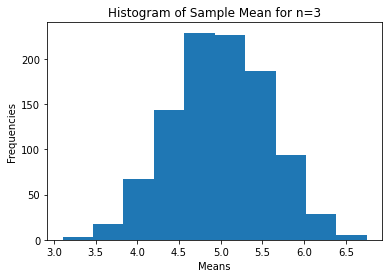

Sample Mean: 4.997586170095958
Sample Standard Deviation: 0.5724107886707618
KS-Statistic and p-value: KstestResult(statistic=0.017078628468280344, pvalue=0.9275309040275785)
We fail to reject the null hypothesis because both samples used in the ktest are normal and from the same distribution.


In [22]:
sampleMeans()

plt.hist(meanArray[2,:]) # n = 3 histogram
plt.xlabel('Means')
plt.ylabel('Frequencies')
plt.title('Histogram of Sample Mean for n=3')
plt.show()

#y = np.random.normal(5, 1, 50)
sampleMean3 = np.mean(meanArray[2,:])
sampleStd3 = np.std(meanArray[2,:])
kstest(zscore(meanArray[2,:]), 'norm')

print("Sample Mean: " + str(sampleMean3))
print("Sample Standard Deviation: " + str(sampleStd3))
print("KS-Statistic and p-value: " + str(kstest(zscore(meanArray[2,:]), 'norm')))
print("We fail to reject the null hypothesis because both samples used in the ktest are normal and from the same distribution.")

#### 1d. Repeat 1c but for n=20. What changes when the number of samples increases?

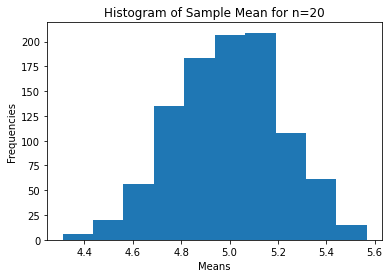

Sample Mean: 4.994065815932247
Sample Standard Deviation: 0.21942708746662593
KS-Statistic and p-value: KstestResult(statistic=0.02076800326825934, pvalue=0.7733215095779042)
When the number of samples increases, the p-value increases.
We fail to reject the null hypothesis because both samples used in the kstest are normal and from the same distribution.


In [6]:
plt.hist(meanArray[19,:]) # n = 3 histogram
plt.xlabel('Means')
plt.ylabel('Frequencies')
plt.title('Histogram of Sample Mean for n=20')
plt.show()

sampleMean20 = np.mean(meanArray[19,:])
sampleStd20 = np.std(meanArray[19,:])
kstest(zscore(meanArray[19,:]), 'norm')

print("Sample Mean: " + str(sampleMean20))
print("Sample Standard Deviation: " + str(sampleStd20))
print("KS-Statistic and p-value: " + str(kstest(zscore(meanArray[19,:]), 'norm')))

print("When the number of samples increases, the p-value increases.")
print("We fail to reject the null hypothesis because both samples used in the kstest are normal and from the same distribution.")


##### (2) Now we will explore sampling from an alternate distribution type.

#### 2a. Sample the Pareto distribution (`np.random.pareto`) with parameter shape = 2, 1000 times. Plot the histogram of these values. Describe the shape of this histogram in words. Is it anything like the normal distribution?

The shape of the histogram is that of a descending staircase. There is a rapid decay such that as the x values increase, the y values decrease.
It is nothing like the normal distribution.


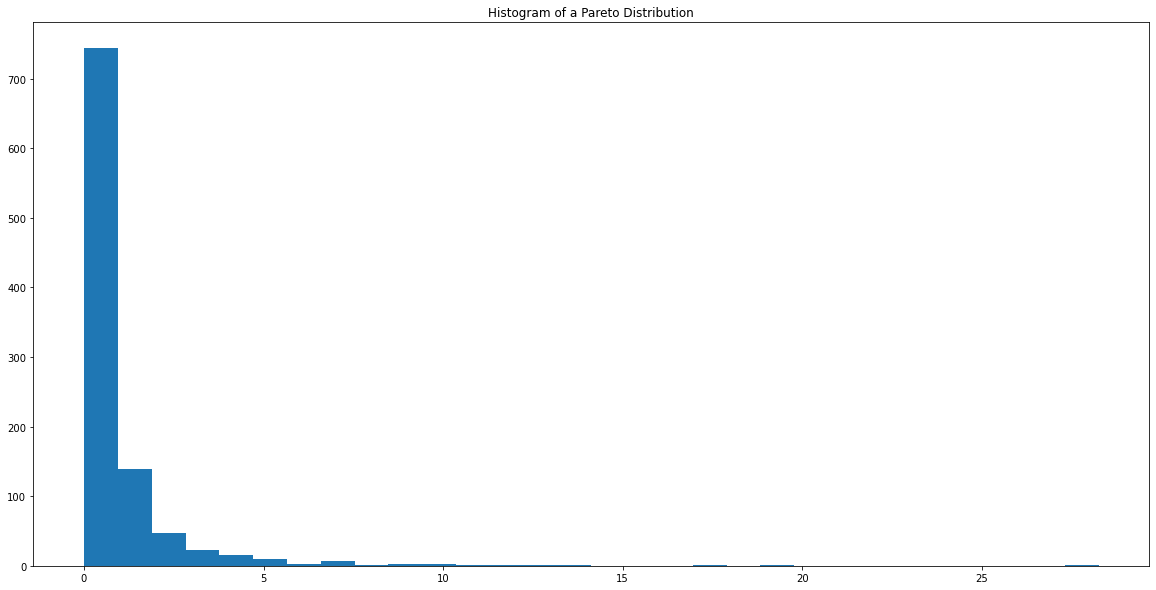

In [7]:
arrayPareto = np.random.pareto(2,1000)
meanParetoArray = np.zeros((50, 1000))
stdParetoArray = np.zeros(50)

for i in range(50):
    for j in range(1000):
        meanParetoArray[i][j] = np.mean(np.random.pareto(2,i+1)) #storing each calculated mean in an array
    stdParetoArray[i] = np.std(meanParetoArray[i][:]) #storing standard deviation of calculated mean

plt.figure(figsize=(20, 10))
plt.hist(arrayPareto, bins = 30)
plt.title('Histogram of a Pareto Distribution')

print("The shape of the histogram is that of a descending staircase. There is a rapid decay such that as the x values increase, the y values decrease.")
print("It is nothing like the normal distribution.")

#### 2b. As in problem 1, plot a boxplot of the sample distribution from n=1:50. How does this differ from the plot in 1b and why? Plot the standard deviations of the sample means versus n. Is this any different?

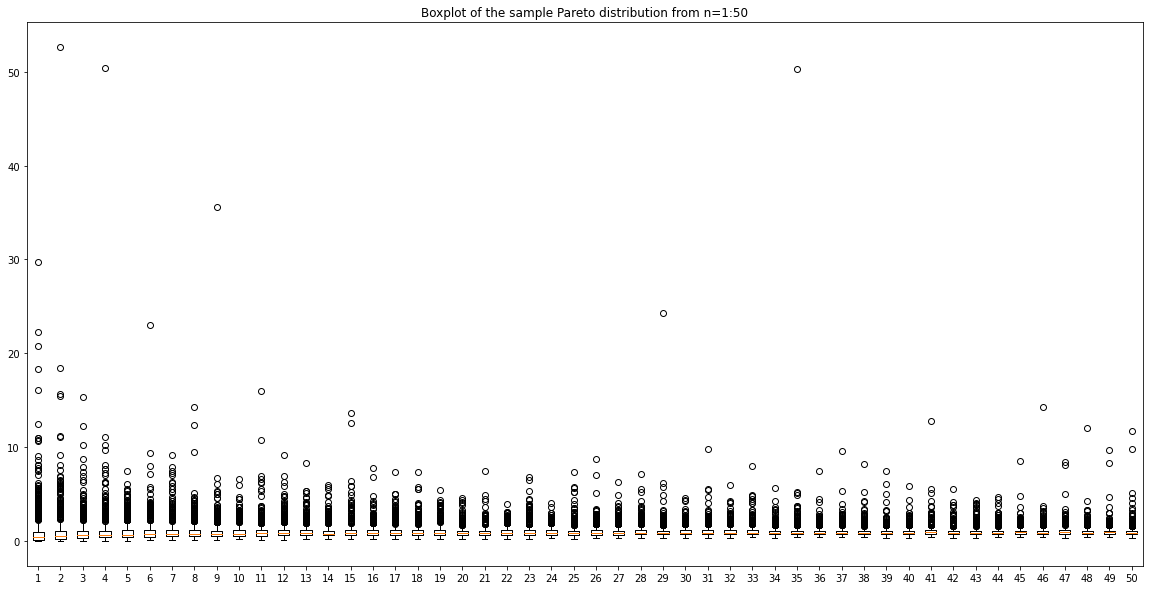

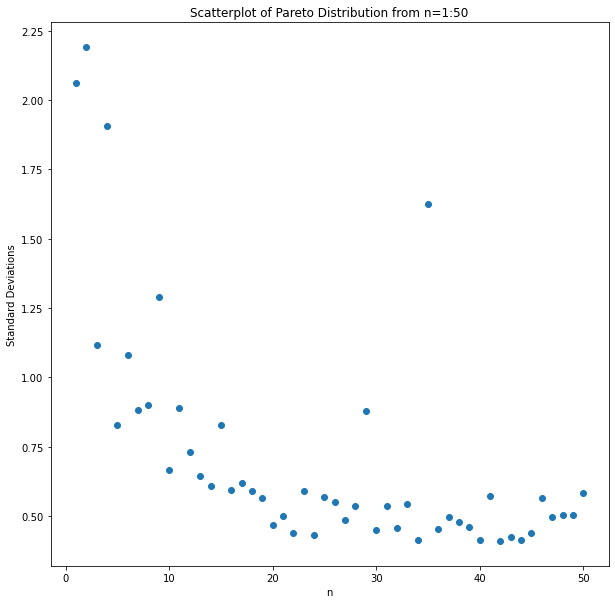

Figure 1 differs from the plot in 1b because the median values fall near 1 and the IQR are much smaller.
Figure 2 of the standard deviations of the sample means versus n shows a Pareto distribution which is different from the shape of a normal distribution.


In [8]:
#figure 1 for sample distribution from n = 1:50
plt.figure(figsize=(20,10))
plt.boxplot(meanParetoArray.T)
plt.title('Boxplot of the sample Pareto distribution from n=1:50')
plt.show()

#figure 2 for standard deviations of the sample means versus n
plt.figure(figsize=(10, 10))
plt.scatter(np.linspace(1,50,50), stdParetoArray)

plt.title('Scatterplot of Pareto Distribution from n=1:50')
plt.xlabel('n')
plt.ylabel('Standard Deviations')
plt.show()

print("Figure 1 differs from the plot in 1b because the median values fall near 1 and the IQR are much smaller.")
print("Figure 2 of the standard deviations of the sample means versus n shows a Pareto distribution which is different from the shape of a normal distribution.")

#### 2c. For n=3, plot the histogram of the sample means. What is this distribution—Pareto or normal? Report your test results.

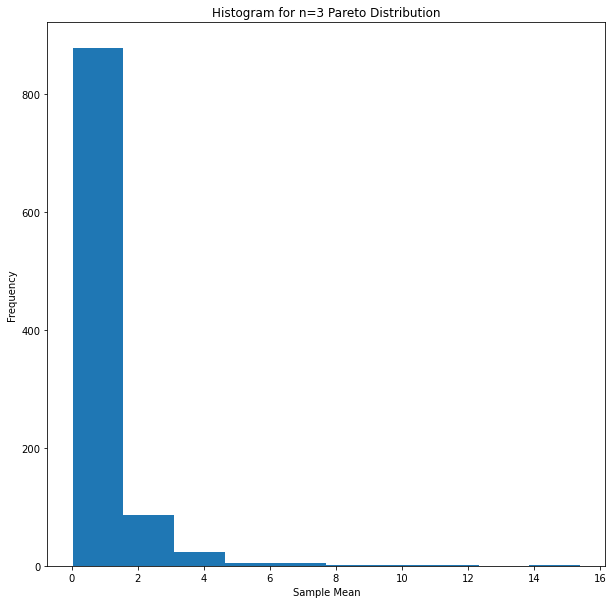

The p-value of the KS test is: 9.928440733813872e-41
This distribution is that of a Pareto distribution. It is not normal.


In [9]:
plt.figure(figsize=(10,10))
plt.hist(meanParetoArray[2,:])
plt.title('Histogram for n=3 Pareto Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

ksPareto = kstest(zscore(meanParetoArray[2,:]), 'norm')
print("The p-value of the KS test is: " + str(ksPareto.pvalue))
print("This distribution is that of a Pareto distribution. It is not normal.")

#### 2d. Repeat 2b and 2c for n=100.

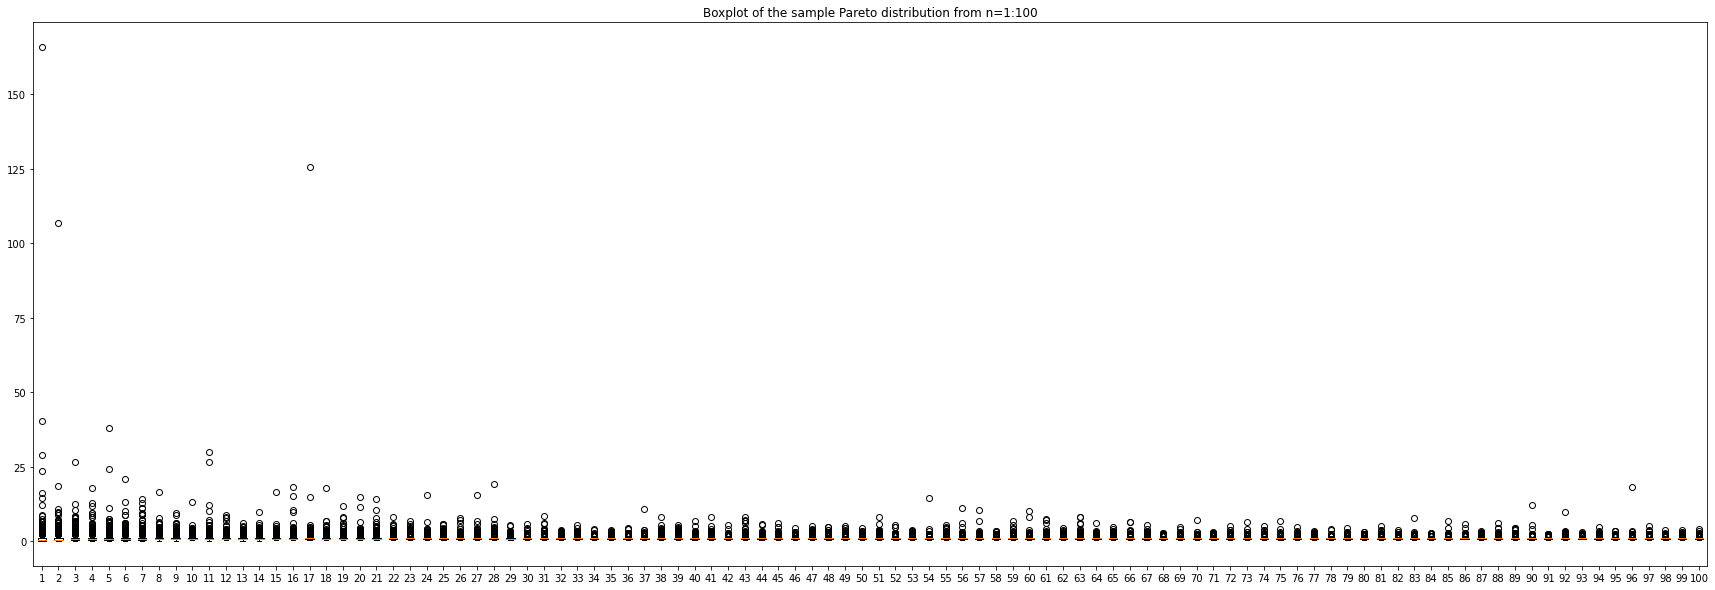

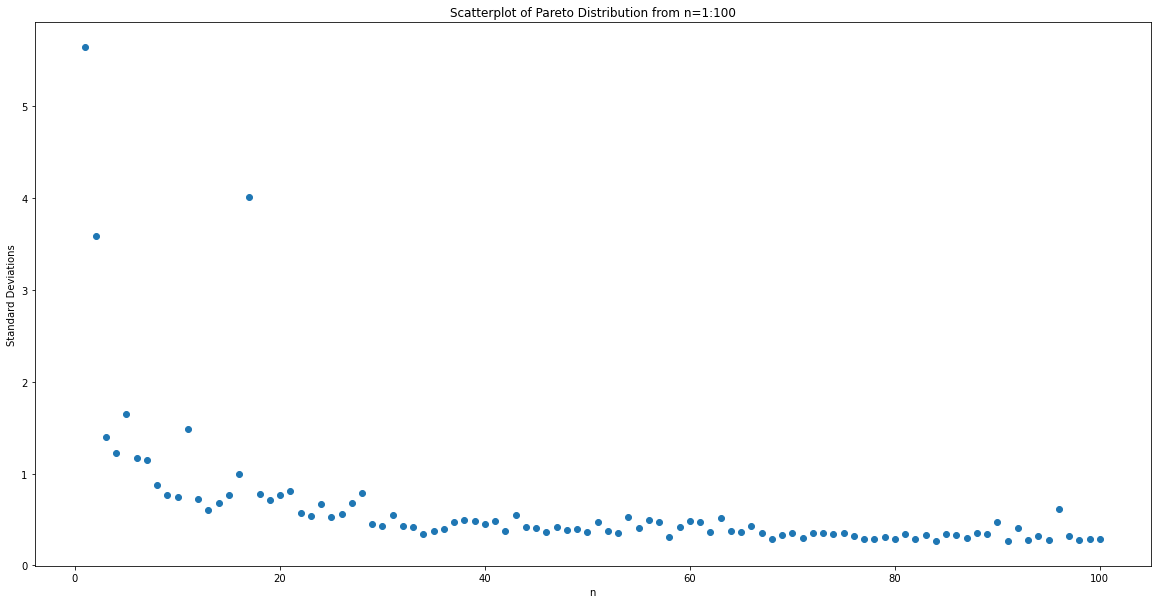

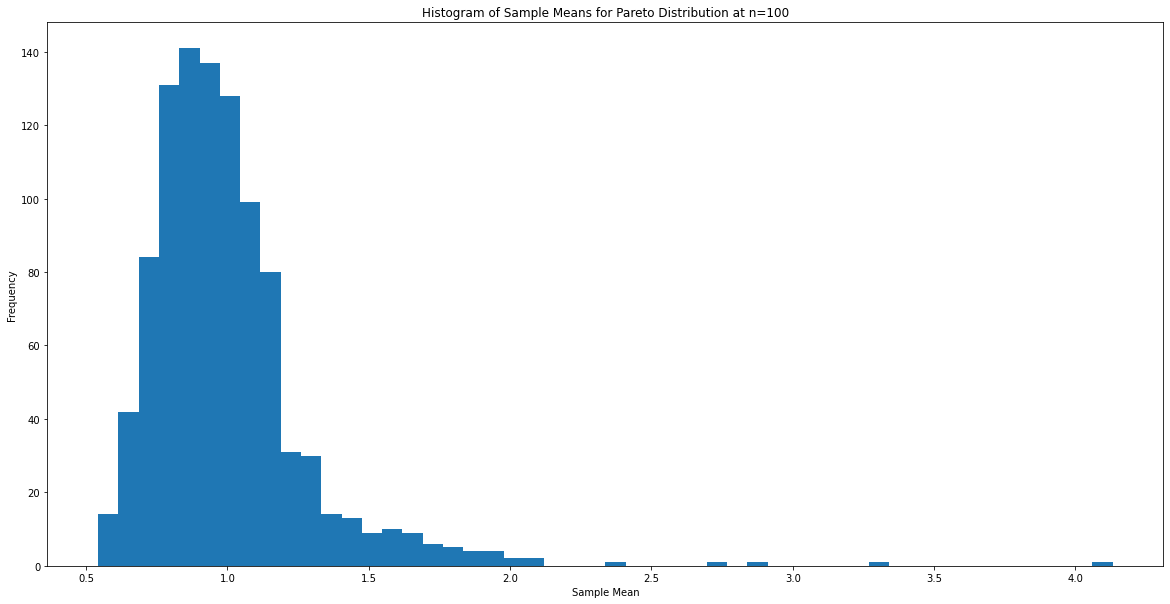

Figure 1 differs from the plot in 1b because the median values fall near 1 and the IQR are much smaller.
Figure 2 of the standard deviations of the sample means versus n shows a Pareto distribution which is different from the shape of a normal distribution.
The p-value given by the KS test is: 3.2741452275826228e-15
This is a Pareto distribution, not a normal distribution.


In [10]:
meanParetoArray2 = np.zeros((100, 1000))
stdParetoArray2 = np.zeros(100)

for i in range(100):
    for j in range(1000):
        meanParetoArray2[i][j] = np.mean(np.random.pareto(2,i+1)) #storing each calculated mean in an array
    stdParetoArray2[i] = np.std(meanParetoArray2[i][:]) #storing standard deviation of calculated mean

#figure 1 for sample distribution from n = 1:100
plt.figure(figsize=(30,10))
plt.boxplot(meanParetoArray2.T)
plt.title('Boxplot of the sample Pareto distribution from n=1:100')
plt.show()

#figure 2 for standard deviations of the sample means versus n
plt.figure(figsize=(20, 10))
plt.scatter(np.linspace(1,100,100), stdParetoArray2)

plt.title('Scatterplot of Pareto Distribution from n=1:100')
plt.xlabel('n')
plt.ylabel('Standard Deviations')
plt.show()

ksPareto2 = kstest(zscore(meanParetoArray2[99,:]),'norm')

#figure 3 for Histogram of the Sample Mean
plt.figure(figsize=(20,10))
plt.hist(meanParetoArray2[99,:], bins = 50)
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means for Pareto Distribution at n=100')
plt.show()

print("Figure 1 differs from the plot in 1b because the median values fall near 1 and the IQR are much smaller.")
print("Figure 2 of the standard deviations of the sample means versus n shows a Pareto distribution which is different from the shape of a normal distribution.")
print("The p-value given by the KS test is: " + str(ksPareto2.pvalue))
print("This is a Pareto distribution, not a normal distribution.")

## (3) Differential expression. In this problem you will use the two-sample t-test to explore what differential hypothesis testing looks like in known standards and how multiple hypothesis correction effects the number of false positives and negatives from these tests.
- Distribution 1, normal with mu=1, sigma=1
- Distribution 2, normal with mu=3, sigma=1

#### 3a. False Negative: Using n=3, perform 100 comparisons of distribution 1 versus distribution 2 with an alpha=0.05. Anytime you fail to reject the hypothesis it is a false negative. Why is this a false negative? Report the number of false negatives from your 100 tests.

Hint: It'd be helpful to define a function that does this for you at this point.

In [11]:
def compNegDist():
    count = 1
    falseNegativeCount = 0;
    while (count <= 100):
        distribution1 = np.random.normal(1,1,3)
        distribution2 = np.random.normal(3,1,3)
        result = ttest_ind(distribution1, distribution2)
        if (result.pvalue > 0.05):
            falseNegativeCount += 1
        count += 1
    return falseNegativeCount

print("It is a false negative because the null hypothesis was rejected when it shouldn't have been rejected.")
print("The number of false negatives from my 100 comparisons is " + str(compNegDist()) + ".")

It is a false negative because the null hypothesis was rejected when it shouldn't have been rejected.
The number of false negatives from my 100 comparisons is 49.


#### 3b. False Positives: Using n=3, perform 100 comparisons of distribution 1 versus distribution 1 with an alpha=0.05. Anytime you reject the hypothesis this is a false positive. Why is this a false positive? Report the number of false positives from your 100 tests.

In [12]:
def compPosDist():
    count = 1
    falsePositiveCount = 0;
    while (count <= 100):
        distribution1 = np.random.normal(1,1,3)
        distribution2 = np.random.normal(1,1,3)
        result = ttest_ind(distribution1, distribution2)
        if (result.pvalue < 0.05):
            falsePositiveCount += 1
        count += 1
    return falsePositiveCount

print("It is a false positive because the null hypothesis was rejected when in fact, it is actually true.")
print("The number of false positives from my 100 comparisons is " + str(compPosDist()) + ".")

It is a false positive because the null hypothesis was rejected when in fact, it is actually true.
The number of false positives from my 100 comparisons is 7.


#### 3c. Repeat 3b but 1000 times. What is the number of false positives? Predict the number of false positives you would get if you compared samples from the same distribution 10,000 times and explain why.

In [13]:
def comp1000Dist():
    count = 1
    falsePositiveCount = 0;
    while (count <= 1000):
        distribution1 = np.random.normal(1,1,3)
        distribution2 = np.random.normal(1,1,3)
        result = ttest_ind(distribution1, distribution2)
        if (result.pvalue < 0.05):
            falsePositiveCount += 1
        count += 1
    return falsePositiveCount

print("The number of false positives is " + str(comp1000Dist()) + ". The number of false positives I would get if I compared samples from the same distribution 10,000 times would be about 500. This is because the rate of false positives is around 5%.")

The number of false positives is 55. The number of false positives I would get if I compared samples from the same distribution 10,000 times would be about 500. This is because the rate of false positives is around 5%.


#### 3d. Now sweep n from 3 to 30 and report the number of false positives and false negatives for each n when you run 100 comparisons. (Provide this in a table format). Please explain the trend you see and interpret its meaning.

n	Neg	Pos
---------------------
3	45.0	5.0
---------------------
4	25.0	2.0
---------------------
5	21.0	2.0
---------------------
6	14.0	5.0
---------------------
7	5.0	5.0
---------------------
8	1.0	9.0
---------------------
9	2.0	3.0
---------------------
10	0.0	3.0
---------------------
11	2.0	5.0
---------------------
12	0.0	9.0
---------------------
13	0.0	4.0
---------------------
14	0.0	4.0
---------------------
15	0.0	2.0
---------------------
16	0.0	5.0
---------------------
17	0.0	5.0
---------------------
18	0.0	7.0
---------------------
19	0.0	7.0
---------------------
20	0.0	4.0
---------------------
21	0.0	6.0
---------------------
22	0.0	6.0
---------------------
23	0.0	7.0
---------------------
24	0.0	5.0
---------------------
25	0.0	4.0
---------------------
26	0.0	3.0
---------------------
27	0.0	7.0
---------------------
28	0.0	2.0
---------------------
29	0.0	4.0
---------------------
30	0.0	6.0
---------------------
The trend of the false negatives is that as n i

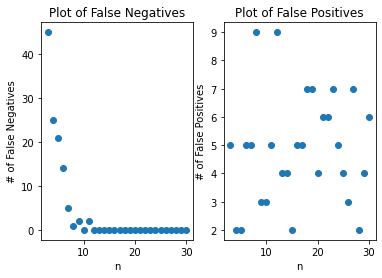

In [14]:
count = 1
falseNArray = np.zeros(28)
falsePArray = np.zeros(28)

for i in range(28):
    count = 1
    falseNegativeCount = 0
    falsePositiveCount = 0
    while (count <= 100):
        distribution1 = np.random.normal(1,1,3+i) #1
        distribution2 = np.random.normal(1,1,3+i) #1
        distribution3 = np.random.normal(3,1,3+i) #2
        result = ttest_ind(distribution1, distribution2)
        result2 = ttest_ind(distribution1, distribution3)
        if (result.pvalue < 0.05):
            falsePositiveCount += 1
        if (result2.pvalue > 0.05):
            falseNegativeCount += 1
        count += 1
    falseNArray[i] = falseNegativeCount
    falsePArray[i] = falsePositiveCount

# plot figure    
x = np.linspace(3, 30, 28)

fig, (neg, pos) = plt.subplots(1, 2)
neg.scatter(x, falseNArray)
pos.scatter(x, falsePArray)
neg.set(title = 'Plot of False Negatives')
pos.set(title = 'Plot of False Positives')
neg.set(xlabel = 'n')
pos.set(xlabel = 'n')
neg.set(ylabel = '# of False Negatives')
pos.set(ylabel = '# of False Positives')

# table figure
nvalues = list(range(3,31))

negArray = np.copy(falseNArray)
posArray = np.copy(falsePArray)

print("n\tNeg\tPos")
print("---------------------")
for nvalues, negArray, posArray in zip(nvalues, negArray, posArray):
    print ('{0}\t{1}\t{2}'.format(nvalues, negArray, posArray))
    print("---------------------")

print("The trend of the false negatives is that as n increases, the number of false negatives approaches zero, reaching zero.")
print("The trend of the false positives is scattered. There seems to be no correlation between false positives and the value of n.")

#### 3e. For n=3, suggest how the number of false negatives changes according to sigma for the two distributions and test this. Report your new values and sigma and the number of false negatives in 100 tests.

False Negatives at sigma value of 1: 58.0
False Negatives at sigma value of 99: 96.0


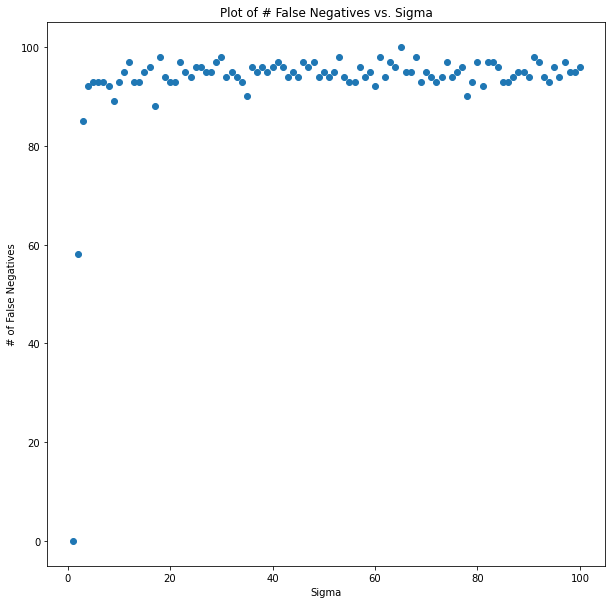

In [15]:
fNArray = np.zeros(100)

for sigma in range(100):
    falseNegativeCount = 0
    for j in range(100):
        distribution1 = np.random.normal(1, sigma, 3)
        distribution2 = np.random.normal(3, sigma, 3)
        result = ttest_ind(distribution1, distribution2)
        if (result.pvalue > 0.05):
            falseNegativeCount += 1
    fNArray[sigma] = falseNegativeCount

print("False Negatives at sigma value of 1: " + str(fNArray[1]))
print("False Negatives at sigma value of 99: " + str(fNArray[99]))

plt.figure(figsize = (10,10))
plt.scatter(np.linspace(1,100,100), fNArray)
plt.xlabel('Sigma')
plt.ylabel('# of False Negatives')
plt.title('Plot of # False Negatives vs. Sigma')
plt.show()

#### 3f. Lastly, perform 3d for p < 0.01 instead of p < 0.05. How does this influence the rate of false positives and negatives? How might you use this when performing many tests?

n	Neg	Pos
---------------------
3	86.0	0.0
---------------------
4	70.0	1.0
---------------------
5	59.0	0.0
---------------------
6	49.0	2.0
---------------------
7	34.0	1.0
---------------------
8	19.0	0.0
---------------------
9	10.0	0.0
---------------------
10	4.0	0.0
---------------------
11	2.0	2.0
---------------------
12	2.0	1.0
---------------------
13	3.0	0.0
---------------------
14	0.0	0.0
---------------------
15	0.0	2.0
---------------------
16	0.0	1.0
---------------------
17	0.0	1.0
---------------------
18	0.0	0.0
---------------------
19	0.0	0.0
---------------------
20	0.0	0.0
---------------------
21	0.0	0.0
---------------------
22	0.0	3.0
---------------------
23	0.0	0.0
---------------------
24	0.0	0.0
---------------------
25	0.0	1.0
---------------------
26	0.0	1.0
---------------------
27	0.0	2.0
---------------------
28	0.0	2.0
---------------------
29	0.0	2.0
---------------------
30	0.0	1.0
---------------------
The trend of the false negatives is that as 

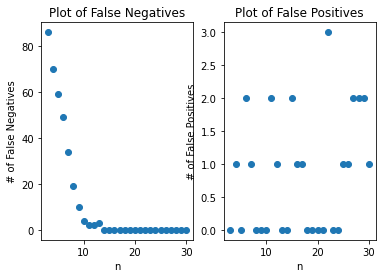

In [16]:
count = 1
falseNArray2 = np.zeros(28)
falsePArray2 = np.zeros(28)

for i in range(28):
    count = 1
    falseNegativeCount = 0
    falsePositiveCount = 0
    while (count <= 100):
        distribution1 = np.random.normal(1,1,3+i) #1
        distribution2 = np.random.normal(1,1,3+i) #1
        distribution3 = np.random.normal(3,1,3+i) #2
        result = ttest_ind(distribution1, distribution2)
        result2 = ttest_ind(distribution1, distribution3)
        if (result.pvalue < 0.01):
            falsePositiveCount += 1
        if (result2.pvalue > 0.01):
            falseNegativeCount += 1
        count += 1
    falseNArray2[i] = falseNegativeCount
    falsePArray2[i] = falsePositiveCount

# plot figure    
x = np.linspace(3, 30, 28)

fig, (neg, pos) = plt.subplots(1, 2)
neg.scatter(x, falseNArray2)
pos.scatter(x, falsePArray2)
neg.set(title = 'Plot of False Negatives')
pos.set(title = 'Plot of False Positives')
neg.set(xlabel = 'n')
pos.set(xlabel = 'n')
neg.set(ylabel = '# of False Negatives')
pos.set(ylabel = '# of False Positives')

# table figure
nvalues = list(range(3,31))

negArray2 = np.copy(falseNArray2)
posArray2 = np.copy(falsePArray2)

print("n\tNeg\tPos")
print("---------------------")
for nvalues, negArray2, posArray2 in zip(nvalues, negArray2, posArray2):
    print ('{0}\t{1}\t{2}'.format(nvalues, negArray2, posArray2))
    print("---------------------")

print("The trend of the false negatives is that as n increases, the number of false negatives approaches zero, reaching zero.")
print("The trend of the false positives is scattered. There seems to be no correlation between false positives and the value of n.")
print("However, the number of false negatives is greater when p < 0.01 for when n is small, and requires greater values of n to reach zero.")
print("You might use this when performing many tests to reach a more true answer of what is being sought since having a greater starting value of false negatives forces you to have more values of n to reach zero false negatives.")

## (4) Power analysis

Now that we've observed the trends above, we have all the tools to talk about power analysis. Power analysis is an essential step when designing an experiment, and asks *assuming we should be rejecting the null hypothesis, what is the probability we will do so*. The power of an experiment is equal to 1 minus the false negative rate. A common choice for the power of an experiment (like a p-value cutoff of 0.05) is 0.8.

#### 4a. Power analysis is often used to determine the necessary N of an experiment. Why might this be used as opposed to the false positive rate?

It is 1 minus the false negative rate because as seen in 3d., as n changes, there is no correlation with the false positive rate. The number of false positives does not depend on n, and n is not dependent on the number of false positives. However, the number of false negatives is dependent on n. When n increases, the number of false negatives decrease.

#### 4b. Determine the necessary N to acheive a power of 0.8 from the situation in (3).

In [17]:
for i in range(np.size(falseNArray)): #3d
    if 1 - falseNArray[i]/100 >= 0.8:
        print("The necessary N to achieve a power of 0.8 when the p-value = 0.05 as in problem 3d is " + str(i + 3) + ".")
        break

for i in range(np.size(falseNArray2)): #3f
    if 1 - falseNArray2[i]/100 >= 0.8:
        print("The necessary N to achieve a power of 0.8 when the p-value = 0.01 as in problem 3f is " + str(i + 3) + ".")
        break

The necessary N to achieve a power of 0.8 when the p-value = 0.05 as in problem 3d is 6.
The necessary N to achieve a power of 0.8 when the p-value = 0.01 as in problem 3f is 8.


## (5) Shaffer et al

In this excercise we're going to explore some basic concepts of statistics, and use them to build up to some more advanced ideas. To examine these ideas we're going to consider a classic of molecular biology—the [Luria-Delbrück experiment](https://en.wikipedia.org/wiki/Luria–Delbrück_experiment). The data we'll use is from [Shaffer et al](https://www.nature.com/articles/nature22794).

In [18]:
repOne = np.array([259, 213, 182, 167, 254, 221, 236, 168, 190, 262, 285, 158, 240, 187, 326, 116, 220, 309, 181, 268, 285, 467, 121, 177, 188, 116, 218, 195, 260, 307, 213, 314, 220, 245, 325, 220, 222, 336, 60, 268, 252, 112, 252])
repTwo = np.array([28, 72, 53, 103, 46, 90, 105, 78, 86, 127, 30, 52, 105, 111, 88, 35, 23, 119, 89, 110, 138, 79, 118, 107, 38, 71, 104, 61, 125])

#### 5a. First, we need to build up a distribution of outcomes for what an experiment would look like if it followed the Luria-Delbruck process.
Fill in the function below keeping track of normal and mutant cells. Then, make a second function, `CVofNRuns`, that runs the experiment 3000 times. You can assume a culture size of 120000 cells, and mutation rate of 0.0001 per cell per generation. What does the distribution of outcomes look like?

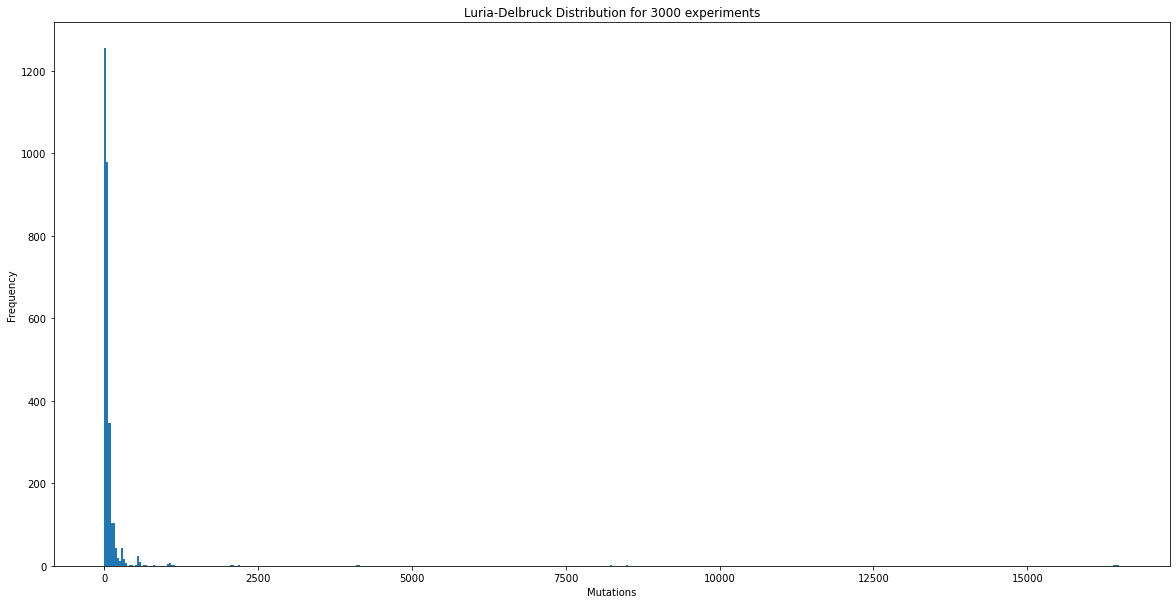

The distribution of outcomes looks like a Pareto distribution.


In [19]:
# Runs the simulation a bunch of times, and looks for how often the fano (cv/mean) comes out to one side

def simLuriaDelbruck(cultureSize, mutationRate):
    nCells, nMuts = 1, 0  # Start with 1 non-resistant cell

    for _ in range(int(np.floor(np.log2(cultureSize)))):  # num of gens
        nCells = 2*nCells     # Double the number of cells, simulating division
        newMuts = np.random.poisson(nCells * mutationRate)  # de novo
        nMuts = 2*nMuts + newMuts       # Previous mutants divide and add
        nCells =  nCells - newMuts     # Non-resistant pop goes down by newMuts

    return nMuts

n = 3000
culture = 120000
mutate = 0.0001

def CVofNRuns(n, culSize, mutateRate):
    nMutant = np.zeros(n)
    for i in range(n):
        nMutant[i] = simLuriaDelbruck(culSize, mutateRate)
    return nMutant

mutated = CVofNRuns(n, culture, mutate)

plt.figure(figsize=(20,10))
plt.hist(mutated, bins = 500)
plt.xlabel('Mutations')
plt.ylabel('Frequency')
plt.title('Luria-Delbruck Distribution for 3000 experiments')
plt.show()

print("The distribution of outcomes looks like a Pareto distribution.")


#### 5b. Compare the distribution of outcomes between the two replicates of the experiment using the 2-sample KS test. Are they consistent with one another?
Hint: Each experiment varies slightly in the amount of time it was run. The absolute values of the numbers doesn't matter, so much as the variation of them. You'll need to correct for this by dividing by the mean of the results.

In [20]:
value1 = repOne/np.mean(repOne)
value2 = repTwo/np.mean(repTwo)
result = ks_2samp(value1,value2)
print("p-value from 2-sample KS test is: " + str(result.pvalue))
print("They are not consistent with one another. We don't reject the null hypothesis because the p-value is very large.")

p-value from 2-sample KS test is: 0.17846555487320592
They are not consistent with one another. We don't reject the null hypothesis because the p-value is very large.


#### 5c. Compare the distribution of outcomes between the experiment and model. Are our results consistent with resistance arising through a Luria-Delbruck related process?

In [21]:
check = mutated/np.mean(mutated)
repOneResult = ks_2samp(value1,check) #model and repOne
repTwoResult = ks_2samp(value2,check) #model and repTwo
print("p-value from repOneResult is: " + str(repOneResult.pvalue))
print("p-value from repTwoResult is: " + str(repTwoResult.pvalue))
print("The null hypothesis is rejected based on the calculated p-values.")
print("The results are consistent with resistance arising through a Luria-Delbruck related process.")

p-value from repOneResult is: 4.806756905176045e-17
p-value from repTwoResult is: 1.6034880223614323e-07
The null hypothesis is rejected based on the calculated p-values.
The results are consistent with resistance arising through a Luria-Delbruck related process.


#### 5d. We assumed a specific mutation rate and final number of cells. How might you show whether or not these parameters influence our results?

To show whether or not specific mutation rate and final number of cells influence our results, they can be plotted against the number of mutated cells. This allows us to view any correlations and trends with the parameters' respect to the number of mutated cells. If there is a significant difference in the number of mutated cells (e.g. a significantly less or more number of mutated cells), then specific mutation rate and/or final number of cells could affect our results.